In [7]:
import pandas as pd
import os

In [8]:
# Define file paths
base_path = r"C:\Users\aliza\Desktop\Dental_Project\archive"
train_file = os.path.join(base_path, "train", "_annotations.csv")
test_file = os.path.join(base_path, "test", "_annotations.csv")
valid_file = os.path.join(base_path, "valid", "_annotations.csv")

# Load CSV files into DataFrames
df_train = pd.read_csv(train_file)
df_test = pd.read_csv(test_file)
df_valid = pd.read_csv(valid_file)

# Display first few rows of each DataFrame
print("Train Data Sample:")
display(df_train.head())

print("Test Data Sample:")
display(df_test.head())

print("Valid Data Sample:")
display(df_valid.head())

# Check dataset summary
print("\nTrain Dataset Summary:")
print(df_train.info())

print("\nUnique Classes in Train Set:", df_train["class"].unique())



# Check test dataset summary
print("\nTest Dataset Summary:")
print(df_test.info())

print("\nUnique Classes in Test Set:", df_test["class"].unique())

# Check validation dataset summary
print("\nValidation Dataset Summary:")
print(df_valid.info())

print("\nUnique Classes in Validation Set:", df_valid["class"].unique())

Train Data Sample:


,filename,width,height,class,xmin,ymin,xmax,ymax
0,0674_jpg.rf.e02a155a0c135687b9301ff9a20d220a.jpg,512,256,Implant,175,116,206,153
1,0674_jpg.rf.e02a155a0c135687b9301ff9a20d220a.jpg,512,256,Fillings,170,109,189,133
2,0674_jpg.rf.e02a155a0c135687b9301ff9a20d220a.jpg,512,256,Implant,221,124,257,178
3,0674_jpg.rf.e02a155a0c135687b9301ff9a20d220a.jpg,512,256,Implant,302,126,329,175
4,0674_jpg.rf.e02a155a0c135687b9301ff9a20d220a.jpg,512,256,Implant,335,114,360,154


Test Data Sample:


,filename,width,height,class,xmin,ymin,xmax,ymax
0,0136_jpg.rf.03e2aec8ec77594665dd1abc68d47bd3.jpg,512,256,Implant,195,169,209,212
1,0136_jpg.rf.03e2aec8ec77594665dd1abc68d47bd3.jpg,512,256,Implant,288,171,301,205
2,0136_jpg.rf.03e2aec8ec77594665dd1abc68d47bd3.jpg,512,256,Implant,203,107,217,150
3,0136_jpg.rf.03e2aec8ec77594665dd1abc68d47bd3.jpg,512,256,Implant,287,104,302,150
4,0136_jpg.rf.03e2aec8ec77594665dd1abc68d47bd3.jpg,512,256,Implant,301,103,312,150


Valid Data Sample:


,filename,width,height,class,xmin,ymin,xmax,ymax
0,0355_jpg.rf.e3e6daab192a51e715ef9fc3394f2a76.jpg,512,256,Fillings,186,85,209,129
1,0355_jpg.rf.e3e6daab192a51e715ef9fc3394f2a76.jpg,512,256,Fillings,167,93,188,128
2,0355_jpg.rf.e3e6daab192a51e715ef9fc3394f2a76.jpg,512,256,Fillings,143,93,170,130
3,0355_jpg.rf.e3e6daab192a51e715ef9fc3394f2a76.jpg,512,256,Fillings,127,132,155,182
4,0355_jpg.rf.e3e6daab192a51e715ef9fc3394f2a76.jpg,512,256,Implant,313,85,330,123



Train Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8030 entries, 0 to 8029
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  8030 non-null   object
 1   width     8030 non-null   int64 
 2   height    8030 non-null   int64 
 3   class     8030 non-null   object
 4   xmin      8030 non-null   int64 
 5   ymin      8030 non-null   int64 
 6   xmax      8030 non-null   int64 
 7   ymax      8030 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 502.0+ KB
None

Unique Classes in Train Set: ['Implant' 'Fillings' 'Impacted Tooth' 'Cavity']

Test Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473 entries, 0 to 472
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  473 non-null    object
 1   width     473 non-null    int64 
 2   height    473 non-null    int64 
 3   class     473 non-null    object

In [9]:
print("\nTrain Class Distribution:\n", df_train["class"].value_counts())
print("\nTest Class Distribution:\n", df_test["class"].value_counts())
print("\nValidation Class Distribution:\n", df_valid["class"].value_counts())



Train Class Distribution:
 class
Fillings          5242
Implant           1784
Cavity             576
Impacted Tooth     428
Name: count, dtype: int64

Test Class Distribution:
 class
Fillings          315
Implant           104
Impacted Tooth     32
Cavity             22
Name: count, dtype: int64

Validation Class Distribution:
 class
Fillings          540
Implant           159
Cavity             43
Impacted Tooth     38
Name: count, dtype: int64


Key Observations:
Fillings is the majority class (~65% of training data).
Implant is moderately frequent (~22% of training data).
Cavity and Impacted Tooth are underrepresented (especially in Test and Validation).
Potential Issues with Imbalance:
A model trained on this dataset may struggle to detect Cavity and Impacted Tooth properly.
It may become biased toward predicting Fillings due to its dominance in the dataset.



#  NOTE:
# Before training, we observed class imbalance in the training dataset.
# 'Fillings' dominates while 'Cavity' and 'Impacted Tooth' are minority classes.
# To address this, we will duplicate minority class samples to balance the dataset.
# This helps prevent the model from overfitting to the majority class and improves performance on rare findings.


In [14]:
# Define minority classes
minority_classes = ['Cavity', 'Impacted Tooth']

# Extract only those rows
df_minority = df_train[df_train['class'].isin(minority_classes)]

# Choose how much to boost them (3x in this example)
duplication_factor = 3

# Concatenate the original and duplicated minority samples
df_train_balanced = pd.concat([df_train] + [df_minority] * duplication_factor).reset_index(drop=True)

# Check new class distribution
print("\nBalanced Train Class Distribution:\n", df_train_balanced["class"].value_counts())



Balanced Train Class Distribution:
 class
Fillings          5242
Cavity            2304
Implant           1784
Impacted Tooth    1712
Name: count, dtype: int64


C:\Users\aliza\AppData\Local\Temp\ipykernel_41580\2589368368.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(original_counts.index, rotation=15)
C:\Users\aliza\AppData\Local\Temp\ipykernel_41580\2589368368.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(balanced_counts.index, rotation=15)


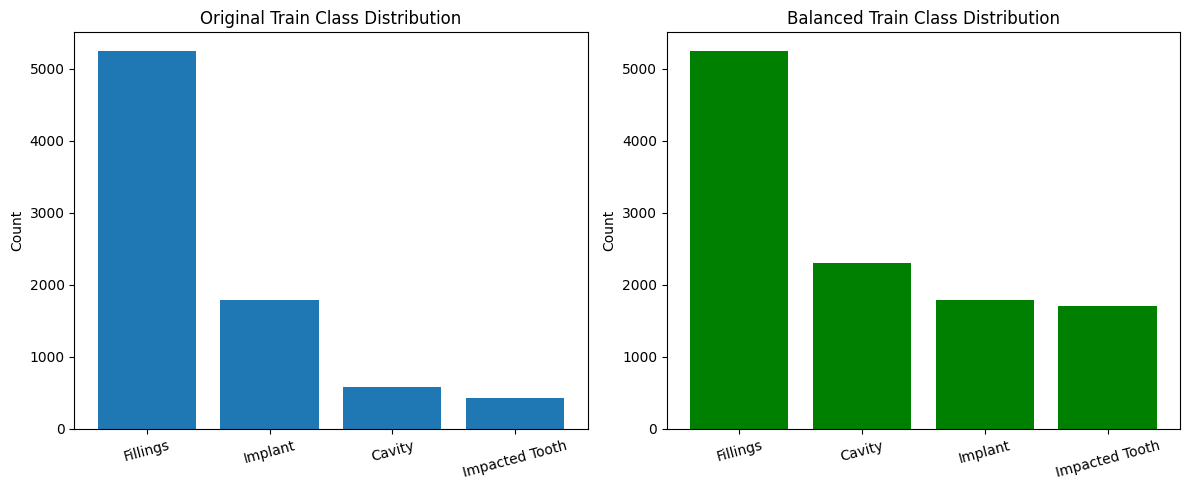

In [15]:
import matplotlib.pyplot as plt

# Original and balanced class counts
original_counts = df_train["class"].value_counts()
balanced_counts = df_train_balanced["class"].value_counts()

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Original distribution
axs[0].bar(original_counts.index, original_counts.values)
axs[0].set_title("Original Train Class Distribution")
axs[0].set_ylabel("Count")
axs[0].set_xticklabels(original_counts.index, rotation=15)

# Balanced distribution
axs[1].bar(balanced_counts.index, balanced_counts.values, color='green')
axs[1].set_title("Balanced Train Class Distribution")
axs[1].set_ylabel("Count")
axs[1].set_xticklabels(balanced_counts.index, rotation=15)

plt.tight_layout()
plt.show()


In [17]:
# Bounding Box Sanity Check: Ensure boxes stay within image boundaries
print("\nBounding Box Validation in Train Set:")
print((df_train["xmin"] >= 0).all(), (df_train["xmax"] <= df_train["width"]).all())
print((df_train["ymin"] >= 0).all(), (df_train["ymax"] <= df_train["height"]).all())



Bounding Box Validation in Train Set:
True True
True True


In [18]:
#  Check for missing values in each dataset
print("\nMissing Values in Train Set:")
print(df_train.isnull().sum())

print("\nMissing Values in Test Set:")
print(df_test.isnull().sum())

print("\nMissing Values in Validation Set:")
print(df_valid.isnull().sum())



Missing Values in Train Set:
filename    0
width       0
height      0
class       0
xmin        0
ymin        0
xmax        0
ymax        0
dtype: int64

Missing Values in Test Set:
filename    0
width       0
height      0
class       0
xmin        0
ymin        0
xmax        0
ymax        0
dtype: int64

Missing Values in Validation Set:
filename    0
width       0
height      0
class       0
xmin        0
ymin        0
xmax        0
ymax        0
dtype: int64


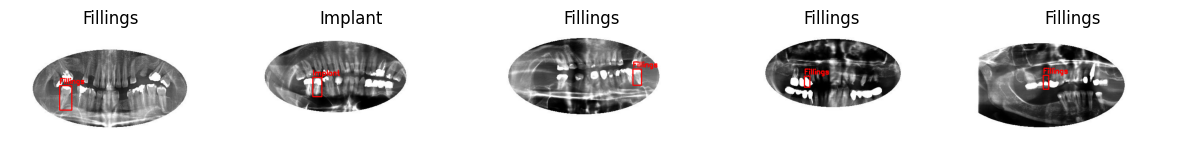

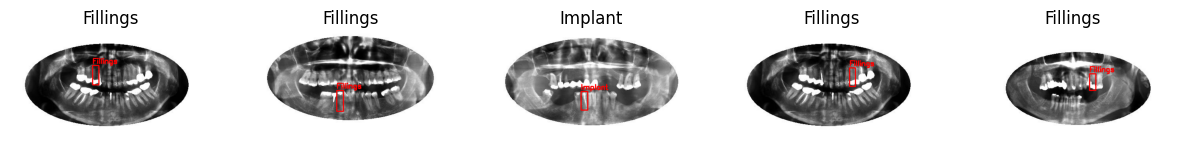

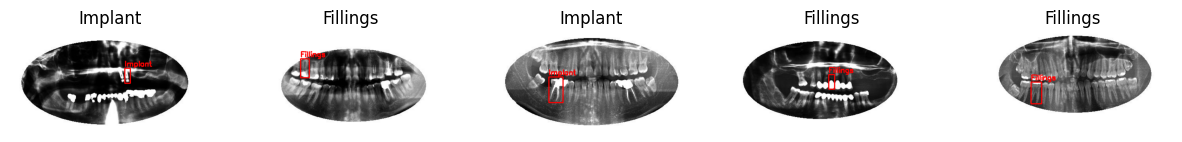

In [19]:
import cv2
import matplotlib.pyplot as plt

# Function to visualize bounding boxes
def visualize_sample(df, folder, num_samples=5):
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))

    for i, (idx, row) in enumerate(df.sample(num_samples).iterrows()):
        image_path = os.path.join(base_path, folder, row["filename"])
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Draw bounding box
        cv2.rectangle(image, (row["xmin"], row["ymin"]), (row["xmax"], row["ymax"]), (255, 0, 0), 2)
        cv2.putText(image, row["class"], (row["xmin"], row["ymin"] - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)

        axes[i].imshow(image)
        axes[i].axis("off")
        axes[i].set_title(row["class"])

    plt.show()

# Visualize train samples
visualize_sample(df_train, "train")

# Visualize test samples
visualize_sample(df_test, "test")

# Visualize validation samples
visualize_sample(df_valid, "valid")

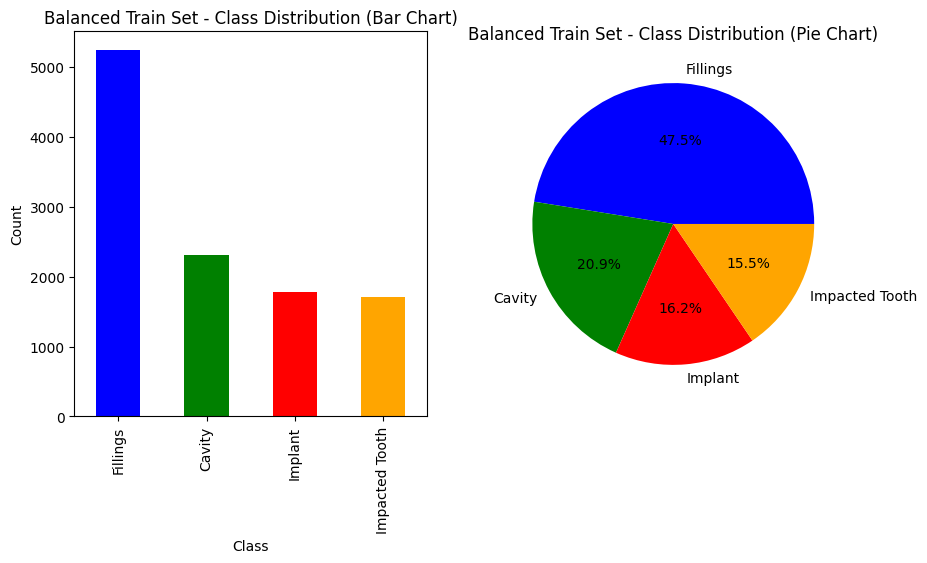

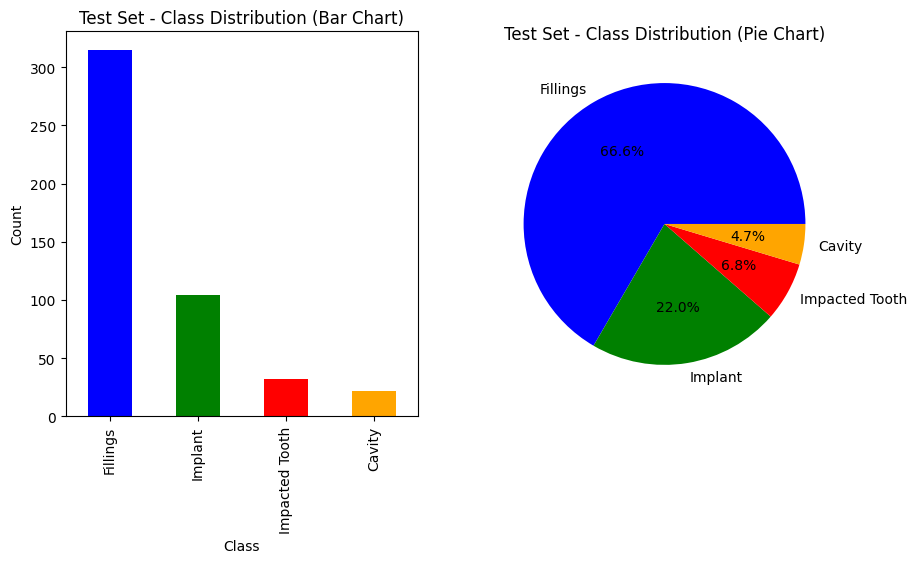

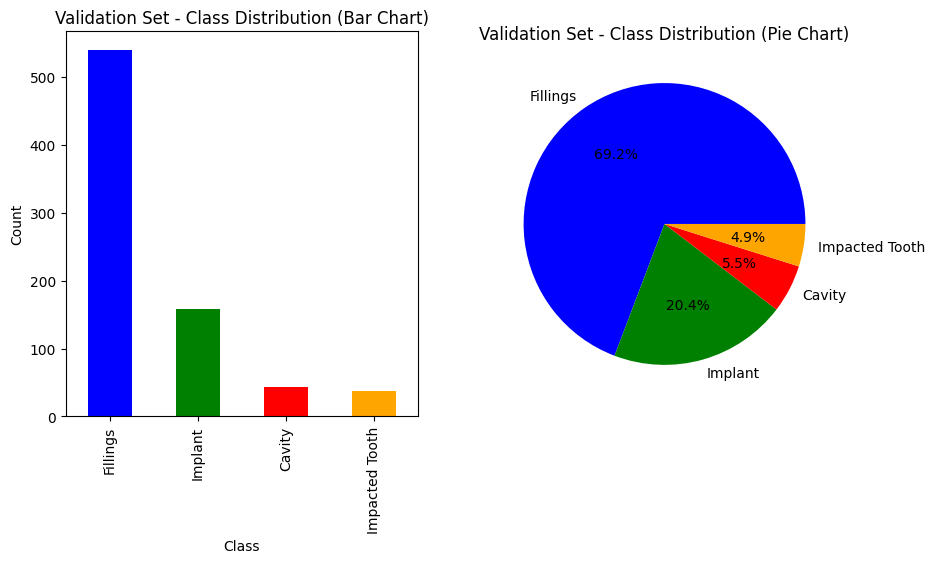

In [21]:
import matplotlib.pyplot as plt

# Function to plot class distribution
def plot_class_distribution(df, title):
    class_counts = df["class"].value_counts()
    
    plt.figure(figsize=(10, 5))
    
    # Bar Plot
    plt.subplot(1, 2, 1)
    class_counts.plot(kind="bar", color=['blue', 'green', 'red', 'orange'])
    plt.xlabel("Class")
    plt.ylabel("Count")
    plt.title(f"{title} - Class Distribution (Bar Chart)")
    
    # Pie Chart
    plt.subplot(1, 2, 2)
    class_counts.plot(kind="pie", autopct='%1.1f%%', colors=['blue', 'green', 'red', 'orange'])
    plt.ylabel("")
    plt.title(f"{title} - Class Distribution (Pie Chart)")
    
    plt.show()

# Plot distributions for each dataset
plot_class_distribution(df_train_balanced, "Balanced Train Set")
plot_class_distribution(df_test, "Test Set")
plot_class_distribution(df_valid, "Validation Set")

In [22]:
import torch
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

# Compute class weights
class_labels = df_train_balanced["class"].values  # Extract class labels
unique_classes = np.unique(class_labels)  # Get unique class names

class_weights = compute_class_weight(class_weight='balanced', classes=unique_classes, y=class_labels)
class_weights = torch.tensor(class_weights, dtype=torch.float32)  # Convert to tensor

# Define weighted loss function (for PyTorch)
criterion = torch.nn.CrossEntropyLoss(weight=class_weights)

print("Class Weights:", class_weights)


Class Weights: tensor([1.1981, 0.5266, 1.6124, 1.5474])


In [23]:
import torch.nn as nn
import torch

# Use your computed weights from earlier
class_weights = torch.tensor([1.1981, 0.5266, 1.6124, 1.5474], dtype=torch.float32)
if torch.cuda.is_available():
    class_weights = class_weights.cuda()

# Define the weighted loss function
criterion = nn.CrossEntropyLoss(weight=class_weights)


In [26]:
import os
import pandas as pd

# 1️⃣ Save the balanced training DataFrame to a new CSV
df_train_balanced.to_csv(
    "C:/Users/aliza/Desktop/Dental_Project/archive/train/_annotations_balanced.csv",
    index=False
)

# 2️⃣ Define the class mapping (MUST match the order used in your training weights!)
class_mapping = {
    "Cavity": 0,
    "Fillings": 1,
    "Impacted Tooth": 2,
    "Implant": 3
}

# 3️⃣ Function to convert CSV annotations to YOLO format
def convert_to_yolo(csv_path, image_folder):
    df = pd.read_csv(csv_path)

    for _, row in df.iterrows():
        image_filename = row["filename"]
        img_width, img_height = row["width"], row["height"]

        # Convert bounding box to YOLO format
        x_center = (row["xmin"] + row["xmax"]) / 2.0 / img_width
        y_center = (row["ymin"] + row["ymax"]) / 2.0 / img_height
        bbox_width = (row["xmax"] - row["xmin"]) / img_width
        bbox_height = (row["ymax"] - row["ymin"]) / img_height

        # Get class ID
        class_id = class_mapping[row["class"]]

        # Define output .txt path for YOLO
        label_filename = os.path.join(image_folder, image_filename.replace(".jpg", ".txt"))

        # Write annotation in YOLO format
        with open(label_filename, "a") as f:  # Use 'w' to overwrite if needed
            f.write(f"{class_id} {x_center:.6f} {y_center:.6f} {bbox_width:.6f} {bbox_height:.6f}\n")

# 4️⃣ Paths to your image folders and annotation CSVs
convert_to_yolo(
    "C:/Users/aliza/Desktop/Dental_Project/archive/train/_annotations_balanced.csv",
    "C:/Users/aliza/Desktop/Dental_Project/archive/train/"
)

convert_to_yolo(
    "C:/Users/aliza/Desktop/Dental_Project/archive/valid/_annotations.csv",
    "C:/Users/aliza/Desktop/Dental_Project/archive/valid/"
)

convert_to_yolo(
    "C:/Users/aliza/Desktop/Dental_Project/archive/test/_annotations.csv",
    "C:/Users/aliza/Desktop/Dental_Project/archive/test/"
)

print("✅ All datasets converted to YOLO format!")


✅ All datasets converted to YOLO format!


In [27]:
from ultralytics import YOLO
import torch

# ✅ Load a better model (small version for higher accuracy than nano)
model = YOLO("yolov8s.pt")  # Options: 'yolov8n.pt', 'yolov8s.pt', 'yolov8m.pt'

# ✅ Train the model
model.train(
    data="C:/Users/aliza/Desktop/Dental_Project/archive/dataset.yaml",  # Make sure this YAML is correct
    epochs=100,                      # More training time
    imgsz=768,                       # Higher resolution = better for small features
    batch=16,                        # Adjust based on GPU memory
    augment=True,                    # Stronger built-in augmentation
    device="cuda" if torch.cuda.is_available() else "cpu"  # Use GPU if available
)

print("✅ YOLOv8 training complete!")


100%|██████████| 21.5M/21.5M [00:05<00:00, 4.35MB/s]


New https://pypi.org/project/ultralytics/8.3.109 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.85  Python-3.10.11 torch-2.6.0+cu118 CUDA:0 (NVIDIA GeForce RTX 4080 Laptop GPU, 12282MiB)
engine\trainer: task=detect, mode=train, model=yolov8s.pt, data=C:/Users/aliza/Desktop/Dental_Project/archive/dataset.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=768, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None

train: Scanning C:\Users\aliza\Desktop\Dental_Project\archive\train... 1075 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1075/1075 [00:01<00:00, 715.19it/s]

train: WARNING  C:\Users\aliza\Desktop\Dental_Project\archive\train\0001_jpg.rf.30a42966fb9c51553f6949b70234218d.jpg: 12 duplicate labels removed
train: WARNING  C:\Users\aliza\Desktop\Dental_Project\archive\train\0001_jpg.rf.57229a11e925669019e179341e22c97a.jpg: 12 duplicate labels removed
train: WARNING  C:\Users\aliza\Desktop\Dental_Project\archive\train\0001_jpg.rf.f94abcb7858bb419a7202ef60ef95bd6.jpg: 12 duplicate labels removed
train: WARNING  C:\Users\aliza\Desktop\Dental_Project\archive\train\0002_jpg.rf.1a9d8354add8d9f605c343abe1f4989a.jpg: 9 duplicate labels removed
train: WARNING  C:\Users\aliza\Desktop\Dental_Project\archive\train\0002_jpg.rf.2e43cdc29b00e6a96296e8e519dc4358.jpg: 9 duplicate labels removed
train: WARNING  C:\Users\aliza\Desktop\Dental_Project\archive\train\0002_jpg.rf.625f03692e32d2b43b4671021ba31f80.jpg: 9 duplicate labels removed
train: WARNING  C:\Users\aliza\Desktop\Dental_Project\archive\train\0006_jpg.rf.3247261244fe482ceba35bd771f399aa.jpg: 15 duplic

train: New cache created: C:\Users\aliza\Desktop\Dental_Project\archive\train.cache


val: Scanning C:\Users\aliza\Desktop\Dental_Project\archive\valid... 121 images, 0 backgrounds, 0 corrupt: 100%|██████████| 121/121 [00:00<00:00, 442.61it/s]

val: WARNING  C:\Users\aliza\Desktop\Dental_Project\archive\valid\0003_jpg.rf.ca9d51a22c825737b49a5f73d3172d23.jpg: 3 duplicate labels removed
val: WARNING  C:\Users\aliza\Desktop\Dental_Project\archive\valid\0021_jpg.rf.0d2cd31b4786f6121d2241aa8c595bf9.jpg: 21 duplicate labels removed
val: WARNING  C:\Users\aliza\Desktop\Dental_Project\archive\valid\0035_jpg.rf.386d686c55e9347823a6e3e75af5152e.jpg: 36 duplicate labels removed
val: WARNING  C:\Users\aliza\Desktop\Dental_Project\archive\valid\0041_jpg.rf.45bc3049f99113cefd018e407df2415f.jpg: 3 duplicate labels removed
val: WARNING  C:\Users\aliza\Desktop\Dental_Project\archive\valid\0056_jpg.rf.6719f5b67f55726778c11022c690ee7f.jpg: 6 duplicate labels removed
val: WARNING  C:\Users\aliza\Desktop\Dental_Project\archive\valid\0068_jpg.rf.8d1f95a7bd401655c7768b48eb35add5.jpg: 6 duplicate labels removed
val: WARNING  C:\Users\aliza\Desktop\Dental_Project\archive\valid\0073_jpg.rf.0a3fc448611ebb614d068de0e7bf25a6.jpg: 12 duplicate labels remo

Plotting labels to runs\detect\train4\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 768 train, 768 val
Using 8 dataloader workers
Logging results to runs\detect\train4
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      6.12G      1.595      2.167      1.316         40        768: 100%|██████████| 68/68 [00:14<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.16it/s]

                   all        121       1559       0.49      0.571      0.556      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      6.33G       1.25      1.201      1.101         94        768: 100%|██████████| 68/68 [00:12<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.87it/s]

                   all        121       1559      0.757       0.63      0.694      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      5.96G       1.23      1.121       1.11         86        768: 100%|██████████| 68/68 [00:12<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.73it/s]

                   all        121       1559      0.619      0.692      0.662      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      6.38G      1.198      1.048      1.096         36        768: 100%|██████████| 68/68 [00:12<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.59it/s]

                   all        121       1559      0.727      0.681      0.748      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      6.33G      1.159     0.9557      1.083        130        768: 100%|██████████| 68/68 [00:12<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.86it/s]

                   all        121       1559      0.753      0.731      0.781      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      5.42G      1.133     0.9286      1.068         98        768: 100%|██████████| 68/68 [00:12<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.22it/s]

                   all        121       1559      0.773      0.757      0.814      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      6.03G      1.127     0.8871      1.065        110        768: 100%|██████████| 68/68 [00:12<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.90it/s]

                   all        121       1559      0.844      0.693      0.794      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100       6.2G      1.112      0.847      1.056        102        768: 100%|██████████| 68/68 [00:12<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.39it/s]

                   all        121       1559      0.756      0.731      0.787        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      6.36G      1.109      0.837      1.052         48        768: 100%|██████████| 68/68 [00:12<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.23it/s]

                   all        121       1559      0.775      0.754      0.814       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      6.06G      1.089     0.8194      1.046         94        768: 100%|██████████| 68/68 [00:12<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.56it/s]

                   all        121       1559       0.77      0.778      0.813      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100         6G      1.074     0.7987      1.038        106        768: 100%|██████████| 68/68 [00:12<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.76it/s]

                   all        121       1559       0.73      0.777      0.782      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      5.56G      1.082     0.7935      1.032         70        768: 100%|██████████| 68/68 [00:12<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.74it/s]

                   all        121       1559       0.75       0.79      0.812      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      5.82G      1.071     0.7578      1.033         94        768: 100%|██████████| 68/68 [00:12<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.74it/s]

                   all        121       1559      0.769      0.757      0.795      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      6.14G      1.045     0.7547      1.025         94        768: 100%|██████████| 68/68 [00:12<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.29it/s]

                   all        121       1559      0.725      0.782      0.759      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      5.96G      1.049     0.7502      1.031        102        768: 100%|██████████| 68/68 [00:12<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.76it/s]

                   all        121       1559      0.784       0.76      0.826       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      6.47G       1.04     0.7262      1.022         90        768: 100%|██████████| 68/68 [00:12<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.36it/s]

                   all        121       1559      0.793      0.751      0.811      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      5.93G      1.022     0.7218      1.019         80        768: 100%|██████████| 68/68 [00:12<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.45it/s]

                   all        121       1559      0.788      0.768       0.81      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      6.06G      1.022     0.7083      1.012         78        768: 100%|██████████| 68/68 [00:12<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.85it/s]

                   all        121       1559      0.769      0.787      0.821      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      6.19G      1.016     0.6936      1.018         18        768: 100%|██████████| 68/68 [00:12<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.08it/s]

                   all        121       1559        0.8      0.775      0.843       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      6.22G     0.9977     0.6954      1.001         94        768: 100%|██████████| 68/68 [00:12<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.49it/s]

                   all        121       1559      0.812      0.756      0.821      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      6.58G     0.9905     0.6685      1.003        130        768: 100%|██████████| 68/68 [00:12<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.60it/s]

                   all        121       1559       0.79      0.799      0.835      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      6.29G     0.9967     0.6605      1.007         82        768: 100%|██████████| 68/68 [00:12<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.75it/s]

                   all        121       1559      0.796      0.777      0.832      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      6.16G     0.9797     0.6582     0.9952        100        768: 100%|██████████| 68/68 [00:12<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.35it/s]

                   all        121       1559      0.762      0.815      0.815      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      6.25G     0.9818     0.6524     0.9941         76        768: 100%|██████████| 68/68 [00:12<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.73it/s]

                   all        121       1559      0.796      0.768      0.819      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      6.16G     0.9718     0.6403     0.9934         66        768: 100%|██████████| 68/68 [00:12<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.40it/s]

                   all        121       1559      0.793      0.742      0.812      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      5.68G     0.9724     0.6435      0.997         36        768: 100%|██████████| 68/68 [00:12<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.26it/s]

                   all        121       1559      0.847       0.76       0.84      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      6.79G     0.9512     0.6221     0.9862         68        768: 100%|██████████| 68/68 [00:12<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.72it/s]

                   all        121       1559      0.782      0.808      0.828      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      6.04G     0.9487     0.6208     0.9784        120        768: 100%|██████████| 68/68 [00:12<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.55it/s]

                   all        121       1559      0.785      0.777      0.814      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100       6.4G     0.9515     0.6042     0.9826         74        768: 100%|██████████| 68/68 [00:12<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.11it/s]

                   all        121       1559      0.781      0.785      0.815      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      5.35G     0.9394     0.6009      0.975         66        768: 100%|██████████| 68/68 [00:12<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.33it/s]

                   all        121       1559      0.782      0.778      0.814      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      6.05G     0.9347     0.5955     0.9795         74        768: 100%|██████████| 68/68 [00:12<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.76it/s]

                   all        121       1559      0.776       0.78      0.819      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      5.45G     0.9392     0.5943     0.9736        164        768: 100%|██████████| 68/68 [00:12<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.34it/s]

                   all        121       1559      0.777      0.797      0.812      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      5.74G     0.9202     0.5846     0.9725        100        768: 100%|██████████| 68/68 [00:12<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.61it/s]

                   all        121       1559      0.788      0.781      0.822      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      6.41G     0.9069       0.57     0.9675        126        768: 100%|██████████| 68/68 [00:13<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.67it/s]

                   all        121       1559      0.767       0.81      0.836      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100         6G     0.9096     0.5698     0.9617        118        768: 100%|██████████| 68/68 [00:12<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.39it/s]

                   all        121       1559      0.756      0.806      0.814      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      6.17G     0.8962     0.5574     0.9585         60        768: 100%|██████████| 68/68 [00:12<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.34it/s]

                   all        121       1559      0.787      0.799      0.821      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      5.57G     0.8756     0.5536     0.9531         78        768: 100%|██████████| 68/68 [00:12<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.67it/s]

                   all        121       1559      0.807      0.805      0.835      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      5.91G     0.8903     0.5552     0.9604         66        768: 100%|██████████| 68/68 [00:12<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.16it/s]

                   all        121       1559      0.759      0.794      0.829      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      5.97G     0.8702     0.5496     0.9498         88        768: 100%|██████████| 68/68 [00:12<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.53it/s]

                   all        121       1559      0.757      0.823      0.812      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      5.95G     0.8691     0.5404     0.9447        104        768: 100%|██████████| 68/68 [00:12<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.74it/s]

                   all        121       1559      0.761      0.815      0.813      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100         6G     0.8504     0.5376     0.9399         50        768: 100%|██████████| 68/68 [00:12<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.70it/s]

                   all        121       1559       0.79      0.804      0.825      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      6.04G     0.8608     0.5291     0.9506         54        768: 100%|██████████| 68/68 [00:12<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.98it/s]

                   all        121       1559      0.798      0.785      0.812      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      6.19G     0.8463     0.5227     0.9491         54        768: 100%|██████████| 68/68 [00:12<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.60it/s]

                   all        121       1559      0.769      0.821      0.825      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      6.14G     0.8387     0.5143     0.9364         66        768: 100%|██████████| 68/68 [00:12<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.25it/s]

                   all        121       1559      0.793      0.811      0.807      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      6.25G     0.8302     0.5197     0.9324        100        768: 100%|██████████| 68/68 [00:12<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.93it/s]

                   all        121       1559      0.792      0.815      0.829      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      6.51G     0.8222     0.5062     0.9279         94        768: 100%|██████████| 68/68 [00:12<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.77it/s]

                   all        121       1559      0.831      0.774      0.826      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      6.02G     0.8166     0.4986     0.9327         78        768: 100%|██████████| 68/68 [00:12<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.78it/s]

                   all        121       1559      0.786      0.838      0.852      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      5.95G     0.8067     0.4918     0.9249        112        768: 100%|██████████| 68/68 [00:12<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.32it/s]

                   all        121       1559      0.802       0.82      0.834      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      5.73G     0.7941     0.4825     0.9221        100        768: 100%|██████████| 68/68 [00:12<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.82it/s]

                   all        121       1559      0.805      0.809       0.84      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      5.73G     0.7898     0.4764      0.919         80        768: 100%|██████████| 68/68 [00:12<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.74it/s]

                   all        121       1559      0.789      0.786      0.819      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      6.32G     0.7889     0.4779     0.9183        116        768: 100%|██████████| 68/68 [00:12<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.79it/s]

                   all        121       1559      0.779        0.8      0.817      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      6.08G     0.7778     0.4735     0.9137        120        768: 100%|██████████| 68/68 [00:12<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.54it/s]

                   all        121       1559      0.755      0.824      0.813      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      6.55G     0.7725     0.4628     0.9161        142        768: 100%|██████████| 68/68 [00:12<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.05it/s]

                   all        121       1559      0.758      0.805      0.822      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      5.86G     0.7621     0.4668     0.9116        124        768: 100%|██████████| 68/68 [00:12<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.99it/s]

                   all        121       1559       0.78      0.786      0.824      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      6.01G      0.763     0.4619       0.91        102        768: 100%|██████████| 68/68 [00:12<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.01it/s]

                   all        121       1559      0.804       0.78      0.829      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      6.34G     0.7515     0.4619     0.9042         40        768: 100%|██████████| 68/68 [00:12<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.77it/s]

                   all        121       1559      0.796      0.799      0.819      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      5.35G     0.7351     0.4543     0.9023         86        768: 100%|██████████| 68/68 [00:12<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.88it/s]

                   all        121       1559        0.8      0.785       0.82      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      6.47G     0.7341     0.4549     0.8963        115        768: 100%|██████████| 68/68 [00:12<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.87it/s]

                   all        121       1559      0.805      0.776      0.816      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      6.53G     0.7412     0.4519     0.9009         48        768: 100%|██████████| 68/68 [00:12<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.67it/s]

                   all        121       1559      0.734      0.833      0.808      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      5.78G     0.7223     0.4448     0.8959         66        768: 100%|██████████| 68/68 [00:12<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.88it/s]

                   all        121       1559      0.793       0.81      0.828      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100       5.8G     0.7094     0.4338     0.8955         52        768: 100%|██████████| 68/68 [00:12<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.93it/s]

                   all        121       1559      0.757      0.814      0.826      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      5.79G     0.7016     0.4371     0.8908         54        768: 100%|██████████| 68/68 [00:12<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.78it/s]

                   all        121       1559      0.793      0.772      0.811      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      6.26G     0.6922     0.4324     0.8871         38        768: 100%|██████████| 68/68 [00:12<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.14it/s]

                   all        121       1559      0.755      0.804      0.796      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      6.02G     0.6932     0.4259      0.885         54        768: 100%|██████████| 68/68 [00:12<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.64it/s]

                   all        121       1559      0.764      0.787      0.804      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      5.95G     0.6893     0.4258     0.8836         90        768: 100%|██████████| 68/68 [00:12<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.88it/s]

                   all        121       1559      0.768      0.805      0.809       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      6.56G     0.6836     0.4261     0.8791         50        768: 100%|██████████| 68/68 [00:12<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.31it/s]

                   all        121       1559      0.772      0.832      0.824      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      6.11G     0.6771     0.4197     0.8809         94        768: 100%|██████████| 68/68 [00:12<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.29it/s]

                   all        121       1559      0.793      0.808      0.829       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      6.21G     0.6755     0.4171     0.8765        114        768: 100%|██████████| 68/68 [00:12<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.10it/s]

                   all        121       1559      0.807      0.802      0.825      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      6.49G     0.6593     0.4116     0.8766         86        768: 100%|██████████| 68/68 [00:12<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.76it/s]

                   all        121       1559      0.775      0.816      0.806      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100       6.7G     0.6662     0.4103     0.8766        146        768: 100%|██████████| 68/68 [00:12<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.82it/s]

                   all        121       1559       0.78      0.821      0.834      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      5.81G     0.6483      0.399     0.8707        108        768: 100%|██████████| 68/68 [00:12<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.27it/s]

                   all        121       1559      0.791       0.83      0.839      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      5.68G       0.65     0.4049     0.8719         36        768: 100%|██████████| 68/68 [00:12<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.82it/s]

                   all        121       1559      0.816      0.782      0.824      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      5.91G     0.6376      0.398     0.8721        148        768: 100%|██████████| 68/68 [00:12<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.67it/s]

                   all        121       1559      0.807      0.805      0.817      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      5.69G     0.6432     0.3974     0.8709        104        768: 100%|██████████| 68/68 [00:12<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.45it/s]

                   all        121       1559      0.792      0.806       0.82      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      6.27G     0.6272     0.3912       0.87         36        768: 100%|██████████| 68/68 [00:12<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.43it/s]

                   all        121       1559      0.809      0.806      0.834      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      6.11G     0.6265     0.3954     0.8624         84        768: 100%|██████████| 68/68 [00:12<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.86it/s]

                   all        121       1559      0.778      0.819      0.824      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      6.34G     0.6171     0.3872     0.8641        116        768: 100%|██████████| 68/68 [00:12<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.20it/s]

                   all        121       1559      0.797      0.815      0.832      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      6.43G     0.6118     0.3856     0.8616         80        768: 100%|██████████| 68/68 [00:12<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.86it/s]

                   all        121       1559      0.791      0.805      0.826      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      5.95G     0.6074     0.3817      0.856         50        768: 100%|██████████| 68/68 [00:12<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.80it/s]

                   all        121       1559       0.81      0.774      0.826      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      5.99G     0.6022     0.3862      0.857        118        768: 100%|██████████| 68/68 [00:12<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.20it/s]

                   all        121       1559      0.786      0.819       0.83      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      5.45G     0.6033     0.3808     0.8588         44        768: 100%|██████████| 68/68 [00:12<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.49it/s]

                   all        121       1559      0.804      0.802      0.839      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      6.06G     0.5885     0.3747     0.8569        170        768: 100%|██████████| 68/68 [00:12<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.74it/s]

                   all        121       1559      0.823      0.805      0.836      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      5.47G     0.5874     0.3756     0.8544        134        768: 100%|██████████| 68/68 [00:12<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.62it/s]

                   all        121       1559      0.796      0.819       0.83      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      5.37G     0.5813     0.3729     0.8525         54        768: 100%|██████████| 68/68 [00:12<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.73it/s]

                   all        121       1559      0.818      0.782      0.824      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      5.53G     0.5861     0.3712     0.8559         94        768: 100%|██████████| 68/68 [00:12<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.66it/s]

                   all        121       1559       0.77       0.83      0.831       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      5.76G     0.5715      0.366      0.855         46        768: 100%|██████████| 68/68 [00:12<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.47it/s]

                   all        121       1559       0.78       0.83      0.837      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      5.72G     0.5647     0.3646     0.8484         94        768: 100%|██████████| 68/68 [00:12<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.55it/s]

                   all        121       1559      0.792      0.839      0.834       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      6.44G     0.5668     0.3634     0.8524         20        768: 100%|██████████| 68/68 [00:13<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.36it/s]

                   all        121       1559      0.774      0.833      0.831      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      6.13G     0.5551     0.3573     0.8474         40        768: 100%|██████████| 68/68 [00:12<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.79it/s]

                   all        121       1559      0.785      0.819       0.84      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      6.22G     0.5553     0.3573     0.8455         78        768: 100%|██████████| 68/68 [00:12<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.75it/s]

                   all        121       1559       0.79      0.815      0.833      0.561


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100       5.1G     0.5116     0.3207     0.8345         10        768: 100%|██████████| 68/68 [00:12<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.70it/s]

                   all        121       1559      0.782      0.818      0.818      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      5.09G     0.4994      0.312     0.8328         68        768: 100%|██████████| 68/68 [00:12<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.72it/s]

                   all        121       1559       0.77      0.821      0.836      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100       5.1G     0.4961     0.3123     0.8314         66        768: 100%|██████████| 68/68 [00:12<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.51it/s]

                   all        121       1559      0.803      0.794      0.835      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      5.06G      0.483     0.3042     0.8282         90        768: 100%|██████████| 68/68 [00:12<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.16it/s]

                   all        121       1559      0.799      0.787      0.836       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      5.04G     0.4791     0.3051     0.8235         40        768: 100%|██████████| 68/68 [00:12<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.70it/s]

                   all        121       1559      0.783       0.82      0.832      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      5.08G     0.4698     0.2984     0.8251         50        768: 100%|██████████| 68/68 [00:12<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.60it/s]

                   all        121       1559      0.842      0.763      0.833      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100       5.1G     0.4659      0.298     0.8239         36        768: 100%|██████████| 68/68 [00:12<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.54it/s]

                   all        121       1559      0.823      0.774      0.834      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100       5.1G     0.4642     0.2982     0.8213         10        768: 100%|██████████| 68/68 [00:12<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.99it/s]

                   all        121       1559      0.771       0.82      0.829      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      5.11G     0.4562     0.2937     0.8208         36        768: 100%|██████████| 68/68 [00:12<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.50it/s]

                   all        121       1559      0.776      0.818      0.831      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      5.06G     0.4476     0.2905     0.8172         36        768: 100%|██████████| 68/68 [00:12<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.54it/s]

                   all        121       1559       0.78       0.82       0.83       0.56



100 epochs completed in 0.396 hours.
Optimizer stripped from runs\detect\train4\weights\last.pt, 22.5MB
Optimizer stripped from runs\detect\train4\weights\best.pt, 22.5MB

Validating runs\detect\train4\weights\best.pt...
Ultralytics 8.3.85  Python-3.10.11 torch-2.6.0+cu118 CUDA:0 (NVIDIA GeForce RTX 4080 Laptop GPU, 12282MiB)
Model summary (fused): 72 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.15it/s]


                   all        121       1559      0.819      0.774      0.841      0.553
              Fillings        105        582      0.831       0.84      0.888      0.592
               Implant        105        699      0.876       0.88      0.926      0.627
                Cavity         44         81       0.67      0.481      0.615      0.367
        Impacted Tooth         78        197        0.9      0.893      0.935      0.627
Speed: 0.2ms preprocess, 6.2ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs\detect\train4
✅ YOLOv8 training complete!



image 1/1 C:\Users\aliza\Desktop\Dental_Project\archive\test\0004_jpg.rf.6434bfce7667ea786e5f251dc0d8b8b1.jpg: 384x768 4 Fillingss, 4 Implants, 18.7ms
Speed: 2.4ms preprocess, 18.7ms inference, 8.8ms postprocess per image at shape (1, 3, 384, 768)

image 1/1 C:\Users\aliza\Desktop\Dental_Project\archive\test\0007_jpg.rf.3699155bba57d7aecb1aa801a698ba20.jpg: 384x768 2 Fillingss, 2 Implants, 1 Cavity, 1 Impacted Tooth, 27.1ms
Speed: 2.3ms preprocess, 27.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 768)

image 1/1 C:\Users\aliza\Desktop\Dental_Project\archive\test\0009_jpg.rf.957a0a16c5101765b0679e95eb9619a3.jpg: 384x768 1 Fillings, 2 Cavitys, 1 Impacted Tooth, 33.3ms
Speed: 2.4ms preprocess, 33.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 768)

image 1/1 C:\Users\aliza\Desktop\Dental_Project\archive\test\0038_jpg.rf.e13603a0be37e61c53a3b781040ce9f7.jpg: 384x768 2 Fillingss, 3 Implants, 1 Impacted Tooth, 17.8ms
Speed: 2.2ms preprocess, 17.8ms inferen

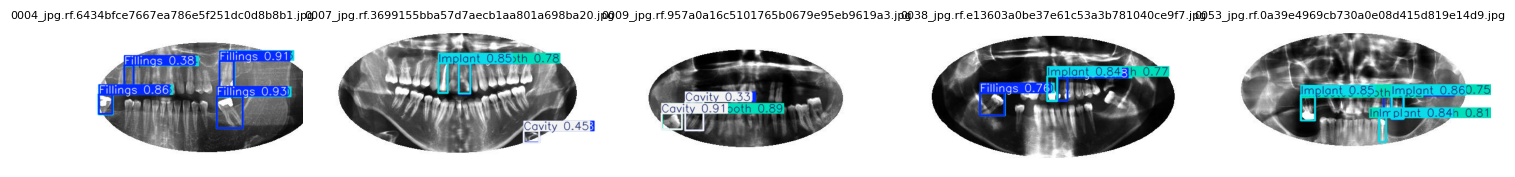

In [ ]:
from ultralytics import YOLO
import os
import cv2
import matplotlib.pyplot as plt

# model path
model_path = r"C:\Users\aliza\Desktop\AI_and_CV_Projects\Dental\runs\detect\train4\weights\best.pt"

# Load the YOLOv8 model
model = YOLO(model_path)

# Test folder
test_folder = r"C:\Users\aliza\Desktop\Dental_Project\archive\test"
image_files = [f for f in os.listdir(test_folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))][:5]

# Run inference and plot
plt.figure(figsize=(15, 8))
for i, img_name in enumerate(image_files):
    img_path = os.path.join(test_folder, img_name)
    result = model(img_path)[0]  # Run prediction

    # Render predictions
    pred_img = result.plot()

    # Display image
    plt.subplot(1, 5, i + 1)
    plt.imshow(cv2.cvtColor(pred_img, cv2.COLOR_BGR2RGB))
    plt.title(img_name, fontsize=8)
    plt.axis("off")

plt.tight_layout()
plt.show()



image 1/1 C:\Users\aliza\Desktop\Dental_Project\archive\test\0004_jpg.rf.6434bfce7667ea786e5f251dc0d8b8b1.jpg: 384x768 4 Fillingss, 4 Implants, 25.7ms
Speed: 11.8ms preprocess, 25.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 768)

image 1/1 C:\Users\aliza\Desktop\Dental_Project\archive\test\0007_jpg.rf.3699155bba57d7aecb1aa801a698ba20.jpg: 384x768 2 Fillingss, 2 Implants, 1 Cavity, 1 Impacted Tooth, 34.7ms
Speed: 2.0ms preprocess, 34.7ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 768)

image 1/1 C:\Users\aliza\Desktop\Dental_Project\archive\test\0009_jpg.rf.957a0a16c5101765b0679e95eb9619a3.jpg: 384x768 1 Fillings, 2 Cavitys, 1 Impacted Tooth, 34.4ms
Speed: 9.6ms preprocess, 34.4ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 768)

image 1/1 C:\Users\aliza\Desktop\Dental_Project\archive\test\0038_jpg.rf.e13603a0be37e61c53a3b781040ce9f7.jpg: 384x768 2 Fillingss, 3 Implants, 1 Impacted Tooth, 31.2ms
Speed: 2.3ms preprocess, 31.2ms infere

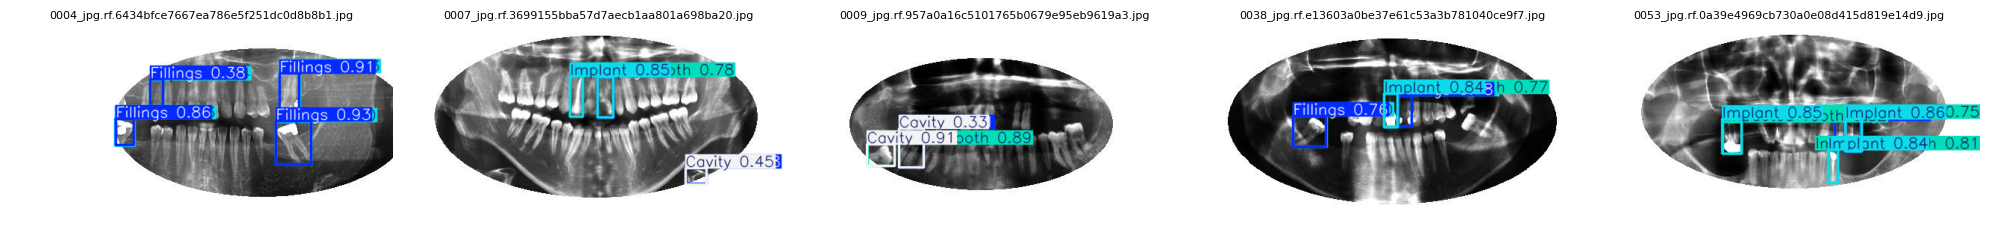

In [38]:
rows = 2
cols = 5  # for 10 images total

plt.figure(figsize=(20, 8))
for i, img_name in enumerate(image_files):
    img_path = os.path.join(test_folder, img_name)
    result = model(img_path)[0]
    pred_img = result.plot()

    plt.subplot(rows, cols, i + 1)
    plt.imshow(cv2.cvtColor(pred_img, cv2.COLOR_BGR2RGB))
    plt.title(img_name, fontsize=8)
    plt.axis("off")

plt.tight_layout()
plt.show()


In [ ]:
import os
import json
from ultralytics import YOLO

# Update model path
model_path = r"C:\Users\aliza\Desktop\AI_and_CV_Projects\Dental\runs\detect\train4\weights\best.pt"
test_folder = r"C:\Users\aliza\Desktop\Dental_Project\archive\test"
output_json_path = r"C:\Users\aliza\Desktop\Dental_Project\outputs\detections.json"

# Load model
model = YOLO(model_path)

# Process a few test images
image_files = [f for f in os.listdir(test_folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))][:5]

# Collect detections
all_detections = []
for file_name in image_files:
    image_path = os.path.join(test_folder, file_name)
    results = model(image_path)[0]
    
    detections = []
    for box in results.boxes:
        cls_id = int(box.cls)
        conf = float(box.conf)
        label = model.names[cls_id]
        bbox = box.xyxy[0].tolist()  # [xmin, ymin, xmax, ymax]
        
        detections.append({
            "label": label,
            "confidence": round(conf, 2),
            "bbox": [round(x, 2) for x in bbox]
        })

    all_detections.append({
        "image": file_name,
        "detections": detections
    })

#  Save to JSON
os.makedirs(os.path.dirname(output_json_path), exist_ok=True)
with open(output_json_path, "w") as f:
    json.dump(all_detections, f, indent=2)

print(f"✅ Detections saved to: {output_json_path}")



image 1/1 C:\Users\aliza\Desktop\Dental_Project\archive\test\0004_jpg.rf.6434bfce7667ea786e5f251dc0d8b8b1.jpg: 384x768 4 Fillingss, 4 Implants, 20.9ms
Speed: 8.6ms preprocess, 20.9ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 768)

image 1/1 C:\Users\aliza\Desktop\Dental_Project\archive\test\0007_jpg.rf.3699155bba57d7aecb1aa801a698ba20.jpg: 384x768 2 Fillingss, 2 Implants, 1 Cavity, 1 Impacted Tooth, 19.5ms
Speed: 3.4ms preprocess, 19.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 768)

image 1/1 C:\Users\aliza\Desktop\Dental_Project\archive\test\0009_jpg.rf.957a0a16c5101765b0679e95eb9619a3.jpg: 384x768 1 Fillings, 2 Cavitys, 1 Impacted Tooth, 20.0ms
Speed: 5.7ms preprocess, 20.0ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 768)

image 1/1 C:\Users\aliza\Desktop\Dental_Project\archive\test\0038_jpg.rf.e13603a0be37e61c53a3b781040ce9f7.jpg: 384x768 2 Fillingss, 3 Implants, 1 Impacted Tooth, 6.0ms
Speed: 1.0ms preprocess, 6.0ms inference

In [ ]:
import json

#  Load your detections JSON
detections_file = r"C:\Users\aliza\Desktop\Dental_Project\outputs\detections.json"
with open(detections_file, "r") as f:
    detection_data = json.load(f)

#  Format each image’s detection into a prompt
for image_entry in detection_data:
    image_name = image_entry["image"]
    objects = image_entry["detections"]
    
    if not objects:
        prompt = f"Generate a short dental report for image '{image_name}': No findings were detected."
    else:
        # Count and group by label
        label_counts = {}
        for obj in objects:
            label = obj["label"]
            label_counts[label] = label_counts.get(label, 0) + 1
        
        description = ", ".join([f"{count} {label}(s)" for label, count in label_counts.items()])
        prompt = f"Generate a short dental report for image '{image_name}' based on the following findings: {description}. Use clinical language but keep it brief."
    
    print(f"\n📝 Prompt for {image_name}:\n{prompt}\n")



📝 Prompt for 0004_jpg.rf.6434bfce7667ea786e5f251dc0d8b8b1.jpg:
Generate a short dental report for image '0004_jpg.rf.6434bfce7667ea786e5f251dc0d8b8b1.jpg' based on the following findings: 4 Fillings(s), 4 Implant(s). Use clinical language but keep it brief.


📝 Prompt for 0007_jpg.rf.3699155bba57d7aecb1aa801a698ba20.jpg:
Generate a short dental report for image '0007_jpg.rf.3699155bba57d7aecb1aa801a698ba20.jpg' based on the following findings: 2 Implant(s), 1 Impacted Tooth(s), 1 Cavity(s), 2 Fillings(s). Use clinical language but keep it brief.


📝 Prompt for 0009_jpg.rf.957a0a16c5101765b0679e95eb9619a3.jpg:
Generate a short dental report for image '0009_jpg.rf.957a0a16c5101765b0679e95eb9619a3.jpg' based on the following findings: 2 Cavity(s), 1 Impacted Tooth(s), 1 Fillings(s). Use clinical language but keep it brief.


📝 Prompt for 0038_jpg.rf.e13603a0be37e61c53a3b781040ce9f7.jpg:
Generate a short dental report for image '0038_jpg.rf.e13603a0be37e61c53a3b781040ce9f7.jpg' based on t

In [ ]:
from dotenv import load_dotenv
import os
import openai

#  Load from .env in current folder
load_dotenv()

#  Set API key safely
openai.api_key = os.getenv("OPENAI_API_KEY")


In [ ]:
from openai import OpenAI
import os

#  Load your API key from environment
client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

#  Sample findings
findings = {
    "Implant": 3,
    "Impacted Tooth": 3,
    "Fillings": 2,
    "Cavity": 2
}

#  Create prompt
formatted_findings = ', '.join([f"{v} {k}(s)" for k, v in findings.items()])
prompt = f"Generate a short dental report based on the following findings: {formatted_findings}. Use clinical language but keep it brief."

#  Call GPT using the new API style
response = client.chat.completions.create(
    model="gpt-3.5-turbo",
    messages=[
        {"role": "system", "content": "You are a dental radiology assistant generating professional diagnostic reports."},
        {"role": "user", "content": prompt}
    ],
    temperature=0.6,
    max_tokens=200
)

#  Extract result
report = response.choices[0].message.content
print("🦷 Dental Report:\n", report)


🦷 Dental Report:
 Clinical Findings:
- 3 implants placed in the mandibular arch, well-integrated with surrounding bone.
- 3 impacted teeth identified, requiring further assessment for potential extraction.
- 2 fillings present in the maxillary molars, showing satisfactory adaptation.
- 2 cavities detected in the premolar region, necessitating restorative treatment.

Recommendations:
- Consult with oral surgeon regarding management of impacted teeth.
- Schedule follow-up for restoration of cavities with composite fillings.
- Monitor implants for stability and osseointegration over time.

Overall, comprehensive treatment planning and regular monitoring are essential for optimal oral health outcomes.


c:\Users\aliza\anaconda3\envs\newenv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129463 (\N{TOOTH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


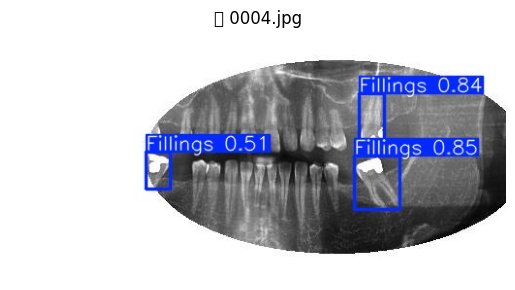

🧾 Prompt:
 Generate a short dental report based on the following findings: 4 Fillings(s), 4 Implant(s). Use clinical language but keep it brief.

🦷 Dental Report:
 Clinical Findings:
- 4 fillings present, located on teeth #3, #14, #19, and #30.
- 4 implants present, integrated successfully.

Impression:
- Dental restorations are in good condition with no signs of complications.

Recommendation:
- Regular dental check-ups and maintenance to monitor the integrity of fillings and implants.


In [ ]:
import os
import cv2
from dotenv import load_dotenv
import matplotlib.pyplot as plt
from openai import OpenAI
from collections import Counter

#  Load API Key
load_dotenv()
client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

#  Detection counts from detections.json
detection_counts = {
    'Fillings': 4,
    'Implant': 4
}

#  Generate prompt
formatted_findings = ', '.join([f"{v} {k}(s)" for k, v in detection_counts.items()])
prompt = f"Generate a short dental report based on the following findings: {formatted_findings}. Use clinical language but keep it brief."

#  GPT call
response = client.chat.completions.create(
    model="gpt-3.5-turbo",
    messages=[
        {"role": "system", "content": "You are a dental radiology assistant generating professional diagnostic reports."},
        {"role": "user", "content": prompt}
    ],
    temperature=0.6,
    max_tokens=200
)
report = response.choices[0].message.content

#  Display image
img_path = r"C:\Users\aliza\Desktop\AI_and_CV_Projects\Dental\runs\detect\predict\0004_jpg.rf.6434bfce7667ea786e5f251dc0d8b8b1.jpg"
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.axis('off')
plt.title("🦷 0004.jpg")
plt.show()

#  Print the prompt and report
print("🧾 Prompt:\n", prompt)
print("\n🦷 Dental Report:\n", report)



image 1/1 C:\Users\aliza\Desktop\Dental_Project\archive\test\0339_jpg.rf.a01899bc5db14b320b43706ed57c67cb.jpg: 384x768 6 Fillingss, 6 Implants, 1 Impacted Tooth, 19.7ms
Speed: 2.1ms preprocess, 19.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 768)


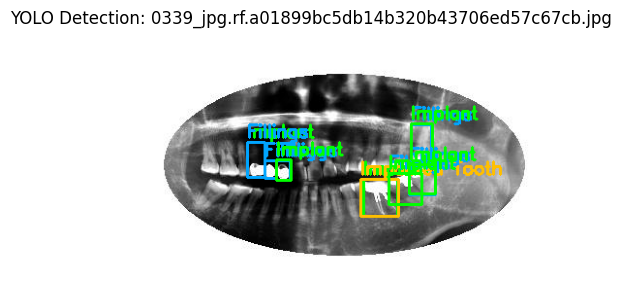

🧾 Prompt:
 Generate a short dental report based on the following findings: 6 Implant(s), 1 Impacted Tooth(s), 6 Fillings(s). Use clinical language but keep it brief.

🦷 Dental Report:
 Clinical Findings:
- 6 implants present, showing successful integration with surrounding bone.
- 1 impacted tooth observed, requiring further evaluation for potential extraction.
- 6 fillings detected, indicating previous restorative work.

Recommendations:
- Monitor impacted tooth closely for potential complications.
- Schedule regular follow-up appointments to assess implant stability and overall oral health.
- Consider treatment options for any decay or damage surrounding existing fillings.


In [ ]:
import os
import random
import cv2
from ultralytics import YOLO
from dotenv import load_dotenv
from openai import OpenAI
from collections import Counter
import matplotlib.pyplot as plt

#  Load your OpenAI key from .env
load_dotenv()
client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

#  Define paths
test_folder = r"C:\Users\aliza\Desktop\Dental_Project\archive\test"
model_path = r"C:\Users\aliza\Desktop\AI_and_CV_Projects\Dental\runs\detect\train4\weights\best.pt"

#  Load YOLOv8 model
model = YOLO(model_path)

#  Randomly pick one image from test folder
images = [f for f in os.listdir(test_folder) if f.lower().endswith(".jpg")]
random_image = random.choice(images)
image_path = os.path.join(test_folder, random_image)

#  Run detection
results = model(image_path)[0]

#  Class names
class_names = ["Fillings", "Implant", "Cavity", "Impacted Tooth"]

#  Class-wise bounding box colors (BGR format)
box_colors = {
    "Fillings": (255, 165, 0),        # Orange
    "Implant": (0, 255, 0),           # Green
    "Cavity": (0, 0, 255),            # Red
    "Impacted Tooth": (0, 191, 255)   # Deep Sky Blue
}

#  Count detections over confidence threshold
counts = Counter()
img = cv2.imread(image_path)

for box in results.boxes:
    conf = float(box.conf)
    if conf < 0.5:
        continue
    x1, y1, x2, y2 = map(int, box.xyxy[0])
    class_id = int(box.cls)
    label = class_names[class_id]
    color = box_colors.get(label, (255, 255, 255))  # Default white
    counts[label] += 1

    # Draw the bounding box
    cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)
    cv2.putText(img, label, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)

#  Display the image
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis('off')
plt.title(f"YOLO Detection: {random_image}")
plt.show()

#  Generate prompt from counts
if counts:
    formatted_findings = ', '.join([f"{v} {k}(s)" for k, v in counts.items()])
    prompt = f"Generate a short dental report based on the following findings: {formatted_findings}. Use clinical language but keep it brief."

    #  Generate report using GPT
    response = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "You are a dental radiology assistant generating professional diagnostic reports."},
            {"role": "user", "content": prompt}
        ],
        temperature=0.6,
        max_tokens=200
    )
    report = response.choices[0].message.content

    #  Display results
    print("🧾 Prompt:\n", prompt)
    print("\n🦷 Dental Report:\n", report)
else:
    print("⚠️ No confident findings detected.")



image 1/1 C:\Users\aliza\Desktop\Dental_Project\archive\test\0004_jpg.rf.6434bfce7667ea786e5f251dc0d8b8b1.jpg: 384x768 4 Fillingss, 4 Implants, 30.1ms
Speed: 2.3ms preprocess, 30.1ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 768)


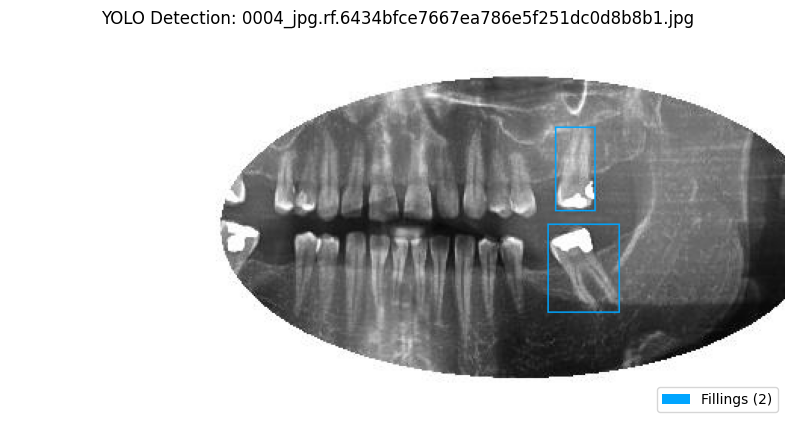

🧾 Prompt:
 Generate a short dental report based on the following findings: 2 Fillings(s). Use clinical language but keep it brief.

🦷 Dental Report:
 **Diagnostic Report**

Findings:
- Two fillings present in the oral cavity.
- No signs of recurrent decay or complications noted.

Impressions:
- Adequate restoration of dental caries.
- Recommend regular follow-up visits to monitor the fillings' integrity.

Additional Notes:
- Patient cooperative during examination.
- No evident discomfort reported during the procedure.

Radiographs reviewed by: [Your Name], Dental Radiology Assistant

Date of Report: [Date]


In [ ]:
import os
import random
import cv2
from ultralytics import YOLO
from dotenv import load_dotenv
from openai import OpenAI
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

#  Load OpenAI key from .env
load_dotenv()
client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

#  Define paths
test_folder = r"C:\Users\aliza\Desktop\Dental_Project\archive\test"
model_path = r"C:\Users\aliza\Desktop\AI_and_CV_Projects\Dental\runs\detect\train4\weights\best.pt"

#  YOLOv8 model
model = YOLO(model_path)

#  Select a random test image
images = [f for f in os.listdir(test_folder) if f.lower().endswith(".jpg")]
random_image = random.choice(images)
image_path = os.path.join(test_folder, random_image)

#  Run detection
results = model(image_path)[0]

#  Class labels
class_names = ["Fillings", "Implant", "Cavity", "Impacted Tooth"]

#  Colors for each class (BGR for OpenCV)
box_colors = {
    "Fillings": (255, 165, 0),        # Orange
    "Implant": (0, 255, 0),           # Green
    "Cavity": (0, 0, 255),            # Red
    "Impacted Tooth": (0, 191, 255)   # Deep Sky Blue
}

#  Convert BGR to RGB for matplotlib
def bgr_to_rgb(bgr):
    return (bgr[2]/255, bgr[1]/255, bgr[0]/255)

#  Filter and count detections
counts = Counter()
img = cv2.imread(image_path)

for box in results.boxes:
    conf = float(box.conf)
    if conf < 0.9:
        continue
    x1, y1, x2, y2 = map(int, box.xyxy[0])
    class_id = int(box.cls)
    label = class_names[class_id]
    color = box_colors.get(label, (255, 255, 255))
    counts[label] += 1
    cv2.rectangle(img, (x1, y1), (x2, y2), color, 1)  # 🔹 Thinner line

#  Convert image to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#  Create color-coded legend
legend_elements = [Patch(facecolor=bgr_to_rgb(box_colors[label]), label=f"{label} ({counts[label]})")
                   for label in counts.keys()]

#  Show image and legend
plt.figure(figsize=(10, 8))
plt.imshow(img_rgb)
plt.axis('off')
plt.title(f"YOLO Detection: {random_image}")
plt.legend(handles=legend_elements, loc='lower right', fontsize='medium', frameon=True)
plt.show()

#  Generate GPT prompt
if counts:
    formatted_findings = ', '.join([f"{v} {k}(s)" for k, v in counts.items()])
    prompt = f"Generate a short dental report based on the following findings: {formatted_findings}. Use clinical language but keep it brief."

    #  Get GPT report
    response = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "You are a dental radiology assistant generating professional diagnostic reports."},
            {"role": "user", "content": prompt}
        ],
        temperature=0.6,
        max_tokens=200
    )
    report = response.choices[0].message.content

    #  Output
    print("🧾 Prompt:\n", prompt)
    print("\n🦷 Dental Report:\n", report)
else:
    print("⚠️ No confident findings detected.")



image 1/1 C:\Users\aliza\Desktop\Dental_Project\archive\test\0967_jpg.rf.fde2e9d5ec9cb179161647bd31c61b23.jpg: 384x768 11 Fillingss, 14 Implants, 3 Impacted Tooths, 31.3ms
Speed: 2.4ms preprocess, 31.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 768)


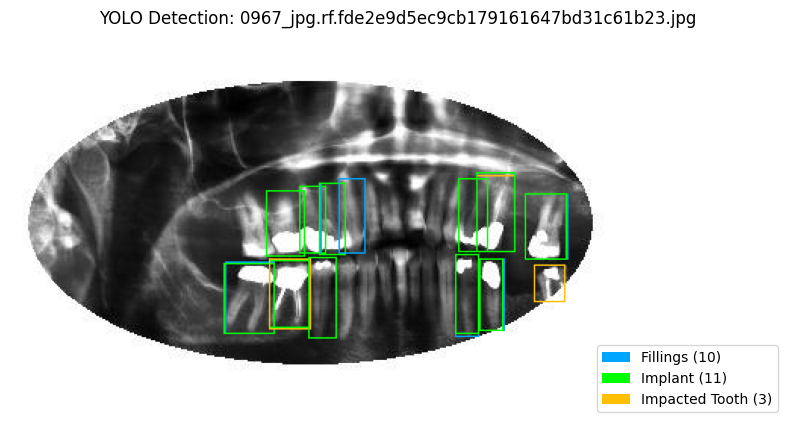

🧾 Prompt:
 Generate a short dental report based on the following findings: 10 Fillings(s), 11 Implant(s), 3 Impacted Tooth(s). Use clinical language but keep it brief.

🦷 Dental Report:
 **Diagnostic Report:**

Clinical Findings:
- 10 Fillings present, indicating previous treatment for dental caries.
- 11 Implants noted, suggesting restoration of missing teeth.
- 3 Impacted Teeth identified, requiring further assessment for potential treatment.

Impression:
The patient has a history of dental restorations with fillings and implants. Impacted teeth may necessitate intervention to prevent complications.

Recommendation:
Further evaluation and treatment planning are advised to address the impacted teeth and ensure optimal oral health outcomes.


In [ ]:
import os
import random
import cv2
from ultralytics import YOLO
from dotenv import load_dotenv
from openai import OpenAI
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

#  Load OpenAI key from .env
load_dotenv()
client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

#  Define paths
test_folder = r"C:\Users\aliza\Desktop\Dental_Project\archive\test"
model_path = r"C:\Users\aliza\Desktop\AI_and_CV_Projects\Dental\runs\detect\train4\weights\best.pt"

#  YOLOv8 model
model = YOLO(model_path)

#  Select a random test image
images = [f for f in os.listdir(test_folder) if f.lower().endswith(".jpg")]
random_image = random.choice(images)
image_path = os.path.join(test_folder, random_image)

#  Run detection
results = model(image_path)[0]

#  Class labels
class_names = ["Fillings", "Implant", "Cavity", "Impacted Tooth"]

#  Colors for each class (BGR for OpenCV)
box_colors = {
    "Fillings": (255, 165, 0),        # Orange
    "Implant": (0, 255, 0),           # Green
    "Cavity": (0, 0, 255),            # Red
    "Impacted Tooth": (0, 191, 255)   # Deep Sky Blue
}

#  Convert BGR to RGB for matplotlib
def bgr_to_rgb(bgr):
    return (bgr[2]/255, bgr[1]/255, bgr[0]/255)

#  Filter and count detections
counts = Counter()
img = cv2.imread(image_path)

for box in results.boxes:
    conf = float(box.conf)
    if conf < 0.7:
        continue
    x1, y1, x2, y2 = map(int, box.xyxy[0])
    class_id = int(box.cls)
    label = class_names[class_id]
    color = box_colors.get(label, (255, 255, 255))
    counts[label] += 1
    cv2.rectangle(img, (x1, y1), (x2, y2), color, 1)  # 🔹 Thinner line

#  Convert image to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#  Create color-coded legend
legend_elements = [Patch(facecolor=bgr_to_rgb(box_colors[label]), label=f"{label} ({counts[label]})")
                   for label in counts.keys()]

#  Show image and legend
plt.figure(figsize=(10, 8))
plt.imshow(img_rgb)
plt.axis('off')
plt.title(f"YOLO Detection: {random_image}")
plt.legend(handles=legend_elements, loc='lower right', fontsize='medium', frameon=True)
plt.show()

#  Generate GPT prompt
if counts:
    formatted_findings = ', '.join([f"{v} {k}(s)" for k, v in counts.items()])
    prompt = f"Generate a short dental report based on the following findings: {formatted_findings}. Use clinical language but keep it brief."

    #  Get GPT report
    response = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "You are a dental radiology assistant generating professional diagnostic reports."},
            {"role": "user", "content": prompt}
        ],
        temperature=0.6,
        max_tokens=200
    )
    report = response.choices[0].message.content

    #  Output
    print("🧾 Prompt:\n", prompt)
    print("\n🦷 Dental Report:\n", report)
else:
    print("⚠️ No confident findings detected.")


image 1/1 C:\Users\aliza\Desktop\Dental_Project\archive\test\0403_jpg.rf.ba4274213b37ecd7b0bbd731d1eab084.jpg: 384x768 8 Fillingss, 8 Implants, 31.0ms
Speed: 2.6ms preprocess, 31.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 768)


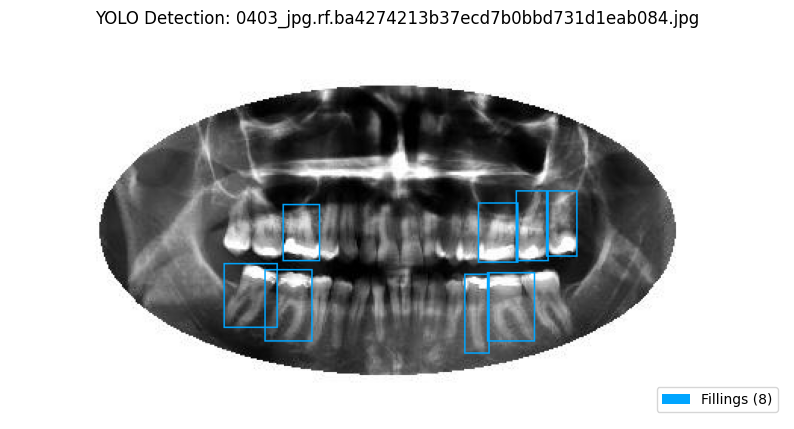

🧾 Prompt:
 Generate a short dental report based on the following findings: 8 Fillings(s). Use clinical language but keep it brief.

🦷 Dental Report:
 Clinical Findings:
- 8 fillings present in various teeth.
- No signs of new carious lesions or recurrent decay noted.
- Overall oral hygiene appears to be fair.

Impression:
- Regular dental check-ups and maintenance of oral hygiene are recommended to monitor the condition of existing fillings and prevent further decay.

Recommendation:
- Follow-up appointment in 6 months for routine dental examination and cleaning.
- Patient education on proper oral hygiene practices and dietary habits to prevent future dental issues.


In [ ]:
import os
import random
import cv2
from ultralytics import YOLO
from dotenv import load_dotenv
from openai import OpenAI
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

#  Load OpenAI key from .env
load_dotenv()
client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

#  Define paths
test_folder = r"C:\Users\aliza\Desktop\Dental_Project\archive\test"
model_path = r"C:\Users\aliza\Desktop\AI_and_CV_Projects\Dental\runs\detect\train4\weights\best.pt"

# 🔍 YOLOv8 model
model = YOLO(model_path)

#  Select a random test image
images = [f for f in os.listdir(test_folder) if f.lower().endswith(".jpg")]
random_image = random.choice(images)
image_path = os.path.join(test_folder, random_image)

#  Run detection
results = model(image_path)[0]

#  Class labels
class_names = ["Fillings", "Implant", "Cavity", "Impacted Tooth"]

#  Colors for each class (BGR for OpenCV)
box_colors = {
    "Fillings": (255, 165, 0),        # Orange
    "Implant": (0, 255, 0),           # Green
    "Cavity": (0, 0, 255),            # Red
    "Impacted Tooth": (0, 191, 255)   # Deep Sky Blue
}

# 🔎 Convert BGR to RGB for matplotlib
def bgr_to_rgb(bgr):
    return (bgr[2]/255, bgr[1]/255, bgr[0]/255)

#  Filter and count detections
counts = Counter()
img = cv2.imread(image_path)

for box in results.boxes:
    conf = float(box.conf)
    class_id = int(box.cls)
    label = class_names[class_id]

    #  Apply confidence thresholds
    if label == "Implant" and conf < 0.9:
        continue
    elif label != "Implant" and conf < 0.5:
        continue

    x1, y1, x2, y2 = map(int, box.xyxy[0])
    color = box_colors.get(label, (255, 255, 255))
    counts[label] += 1
    cv2.rectangle(img, (x1, y1), (x2, y2), color, 1)  # Thin box line

#  Convert image to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#  Create color-coded legend
legend_elements = [Patch(facecolor=bgr_to_rgb(box_colors[label]), label=f"{label} ({counts[label]})")
                   for label in counts.keys()]

#  Show image and legend
plt.figure(figsize=(10, 8))
plt.imshow(img_rgb)
plt.axis('off')
plt.title(f"YOLO Detection: {random_image}")
plt.legend(handles=legend_elements, loc='lower right', fontsize='medium', frameon=True)
plt.show()

#  Generate GPT prompt
if counts:
    formatted_findings = ', '.join([f"{v} {k}(s)" for k, v in counts.items()])
    prompt = f"Generate a short dental report based on the following findings: {formatted_findings}. Use clinical language but keep it brief."

    #  Get GPT report
    response = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "You are a dental radiology assistant generating professional diagnostic reports."},
            {"role": "user", "content": prompt}
        ],
        temperature=0.6,
        max_tokens=200
    )
    report = response.choices[0].message.content

    #  Output
    print("🧾 Prompt:\n", prompt)
    print("\n🦷 Dental Report:\n", report)
else:
    print("⚠️ No confident findings detected.")



image 1/1 C:\Users\aliza\Desktop\Dental_Project\archive\test\0700_jpg.rf.1cf7f2dd7c9cd0a65b6213009e8cc43d.jpg: 384x768 1 Fillings, 2 Cavitys, 1 Impacted Tooth, 20.1ms
Speed: 10.0ms preprocess, 20.1ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 768)


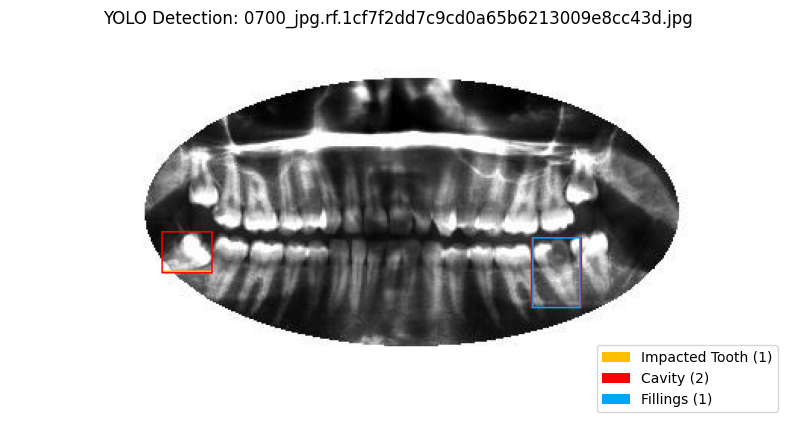

🧾 Prompt:
 Generate a short dental report based on the following findings: 1 Impacted Tooth(s), 2 Cavity(s), 1 Fillings(s). Use clinical language but keep it brief.

🦷 Dental Report:
 Clinical Findings:
- Impacted tooth: One impacted tooth noted in the lower left quadrant.
- Cavities: Two cavities detected in the upper right and lower right molars.
- Fillings: One filling present in the upper left premolar.

Recommendations:
- Referral to oral surgeon for evaluation and possible extraction of impacted tooth.
- Treatment plan for restoration of cavities with fillings.
- Regular follow-up appointments for monitoring oral health status.

Additional Notes:
- Patient should maintain good oral hygiene practices to prevent further decay and complications.
- Educate patient on the importance of regular dental check-ups and preventive care.


In [ ]:
import os
import random
import cv2
from ultralytics import YOLO
from dotenv import load_dotenv
from openai import OpenAI
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

#  Load OpenAI key from .env
load_dotenv()
client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

#  Define paths
test_folder = r"C:\Users\aliza\Desktop\Dental_Project\archive\test"
model_path = r"C:\Users\aliza\Desktop\AI_and_CV_Projects\Dental\runs\detect\train4\weights\best.pt"

#  YOLOv8 model
model = YOLO(model_path)

#  Select a random test image
images = [f for f in os.listdir(test_folder) if f.lower().endswith(".jpg")]
random_image = random.choice(images)
image_path = os.path.join(test_folder, random_image)

#  Run detection
results = model(image_path)[0]

#  Class labels
class_names = ["Fillings", "Implant", "Cavity", "Impacted Tooth"]

#  Colors for each class (BGR for OpenCV)
box_colors = {
    "Fillings": (255, 165, 0),        # Orange
    "Implant": (0, 255, 0),           # Green
    "Cavity": (0, 0, 255),            # Red
    "Impacted Tooth": (0, 191, 255)   # Deep Sky Blue
}

#  Convert BGR to RGB for matplotlib
def bgr_to_rgb(bgr):
    return (bgr[2]/255, bgr[1]/255, bgr[0]/255)

#  Filter and count detections
counts = Counter()
img = cv2.imread(image_path)

for box in results.boxes:
    conf = float(box.conf)
    class_id = int(box.cls)
    label = class_names[class_id]

    #  Apply confidence thresholds
    if label == "Implant" and conf < 0.9:
        continue
    elif label != "Implant" and conf < 0.5:
        continue

    x1, y1, x2, y2 = map(int, box.xyxy[0])
    color = box_colors.get(label, (255, 255, 255))
    counts[label] += 1
    cv2.rectangle(img, (x1, y1), (x2, y2), color, 1)  # Thin box line

# Convert image to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#  Create color-coded legend
legend_elements = [Patch(facecolor=bgr_to_rgb(box_colors[label]), label=f"{label} ({counts[label]})")
                   for label in counts.keys()]

#  Show image and legend
plt.figure(figsize=(10, 8))
plt.imshow(img_rgb)
plt.axis('off')
plt.title(f"YOLO Detection: {random_image}")
plt.legend(handles=legend_elements, loc='lower right', fontsize='medium', frameon=True)
plt.show()

#  Generate GPT prompt
if counts:
    formatted_findings = ', '.join([f"{v} {k}(s)" for k, v in counts.items()])
    prompt = f"Generate a short dental report based on the following findings: {formatted_findings}. Use clinical language but keep it brief."

    #  Get GPT report
    response = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "You are a dental radiology assistant generating professional diagnostic reports."},
            {"role": "user", "content": prompt}
        ],
        temperature=0.6,
        max_tokens=200
    )
    report = response.choices[0].message.content

    #  Output
    print("🧾 Prompt:\n", prompt)
    print("\n🦷 Dental Report:\n", report)
else:
    print("⚠️ No confident findings detected.")



image 1/1 C:\Users\aliza\Desktop\Dental_Project\archive\test\0129_jpg.rf.aa992cd69694d8acea8ae20613465d94.jpg: 384x768 3 Fillingss, 5 Implants, 2 Impacted Tooths, 27.7ms
Speed: 3.1ms preprocess, 27.7ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 768)


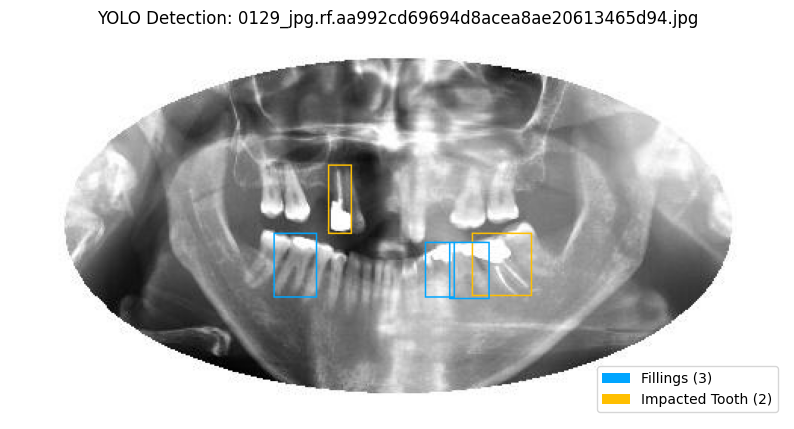

🧾 Prompt:
 Generate a short dental report based on the following findings: 3 Fillings(s), 2 Impacted Tooth(s). Use clinical language but keep it brief.

🦷 Dental Report:
 Clinical Findings:
- 3 fillings present, located in the mandibular left first molar, maxillary right central incisor, and maxillary left first premolar.
- 2 impacted teeth noted, specifically the maxillary left canine and mandibular right third molar.

Impressions:
- Fillings are in good condition and no signs of recurrent decay.
- Impacted teeth may require further evaluation for potential orthodontic or surgical intervention.

Recommendations:
- Monitor impacted teeth closely for any symptoms or complications.
- Consider consultation with an orthodontist or oral surgeon for management of impacted teeth.
- Schedule regular follow-up appointments for routine dental care and monitoring of existing restorations.


In [ ]:
import os
import random
import cv2
from ultralytics import YOLO
from dotenv import load_dotenv
from openai import OpenAI
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

#  Load OpenAI key from .env
load_dotenv()
client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

#  Define paths
test_folder = r"C:\Users\aliza\Desktop\Dental_Project\archive\test"
model_path = r"C:\Users\aliza\Desktop\AI_and_CV_Projects\Dental\runs\detect\train4\weights\best.pt"

#  YOLOv8 model
model = YOLO(model_path)

#  Select a random test image
images = [f for f in os.listdir(test_folder) if f.lower().endswith(".jpg")]
random_image = random.choice(images)
image_path = os.path.join(test_folder, random_image)
#  Run detection
results = model(image_path)[0]

#  Class labels
class_names = ["Fillings", "Implant", "Cavity", "Impacted Tooth"]

# 🎨 Colors for each class (BGR for OpenCV)
box_colors = {
    "Fillings": (255, 165, 0),        # Orange
    "Implant": (0, 255, 0),           # Green
    "Cavity": (0, 0, 255),            # Red
    "Impacted Tooth": (0, 191, 255)   # Deep Sky Blue
}

#  Convert BGR to RGB for matplotlib
def bgr_to_rgb(bgr):
    return (bgr[2]/255, bgr[1]/255, bgr[0]/255)

#  Filter and count detections
counts = Counter()
img = cv2.imread(image_path)

for box in results.boxes:
    conf = float(box.conf)
    class_id = int(box.cls)
    label = class_names[class_id]

    #  Apply confidence thresholds
    if label == "Implant" and conf < 0.9:
        continue
    elif label != "Implant" and conf < 0.5:
        continue

    x1, y1, x2, y2 = map(int, box.xyxy[0])
    color = box_colors.get(label, (255, 255, 255))
    counts[label] += 1
    cv2.rectangle(img, (x1, y1), (x2, y2), color, 1)  # Thin box line

#  Convert image to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 🗂 Create color-coded legend
legend_elements = [Patch(facecolor=bgr_to_rgb(box_colors[label]), label=f"{label} ({counts[label]})")
                   for label in counts.keys()]

# Show image and legend
plt.figure(figsize=(10, 8))
plt.imshow(img_rgb)
plt.axis('off')
plt.title(f"YOLO Detection: {random_image}")
plt.legend(handles=legend_elements, loc='lower right', fontsize='medium', frameon=True)
plt.show()

#  Generate GPT prompt
if counts:
    formatted_findings = ', '.join([f"{v} {k}(s)" for k, v in counts.items()])
    prompt = f"Generate a short dental report based on the following findings: {formatted_findings}. Use clinical language but keep it brief."

    #  Get GPT report
    response = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "You are a dental radiology assistant generating professional diagnostic reports."},
            {"role": "user", "content": prompt}
        ],
        temperature=0.6,
        max_tokens=200
    )
    report = response.choices[0].message.content

    #  Output
    print("🧾 Prompt:\n", prompt)
    print("\n🦷 Dental Report:\n", report)
else:
    print("⚠️ No confident findings detected.")



image 1/1 C:\Users\aliza\Desktop\Dental_Project\archive\test\0339_jpg.rf.a01899bc5db14b320b43706ed57c67cb.jpg: 384x768 6 Fillingss, 6 Implants, 1 Impacted Tooth, 26.4ms
Speed: 2.3ms preprocess, 26.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 768)


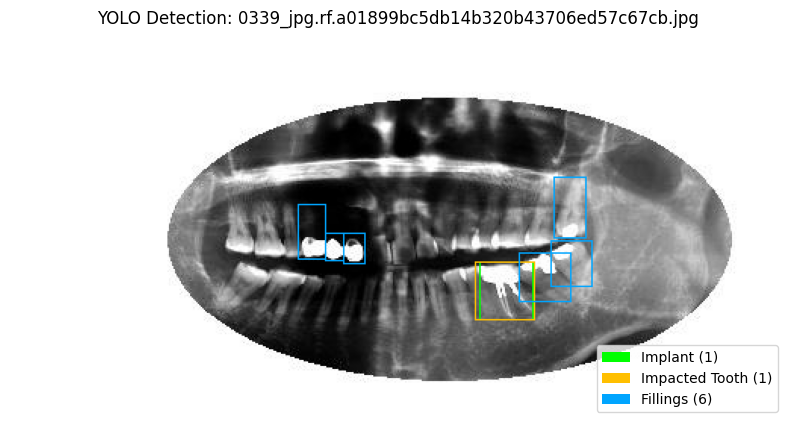

🧾 Prompt:
 Generate a short dental report based on the following findings: 1 Implant(s), 1 Impacted Tooth(s), 6 Fillings(s). Use clinical language but keep it brief.

🦷 Dental Report:
 Clinical Findings:
- 1 implant present in the mandibular arch.
- 1 impacted tooth noted in the maxillary arch.
- 6 fillings observed throughout the dentition.

Impression:
Comprehensive treatment plan recommended to address the impacted tooth and ensure optimal oral health and function. Regular follow-ups advised to monitor the implant and existing fillings for stability and integrity.


In [ ]:
import os
import random
import cv2
from ultralytics import YOLO
from dotenv import load_dotenv
from openai import OpenAI
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

#  Load OpenAI key from .env
load_dotenv()
client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

#  Define paths
test_folder = r"C:\Users\aliza\Desktop\Dental_Project\archive\test"
model_path = r"C:\Users\aliza\Desktop\AI_and_CV_Projects\Dental\runs\detect\train4\weights\best.pt"

#  YOLOv8 model
model = YOLO(model_path)

#  Select a random test image
images = [f for f in os.listdir(test_folder) if f.lower().endswith(".jpg")]
random_image = random.choice(images)
image_path = os.path.join(test_folder, random_image)

#  Run detection
results = model(image_path)[0]

#  Class labels
class_names = ["Fillings", "Implant", "Cavity", "Impacted Tooth"]

#  Colors for each class (BGR for OpenCV)
box_colors = {
    "Fillings": (255, 165, 0),        # Orange
    "Implant": (0, 255, 0),           # Green
    "Cavity": (0, 0, 255),            # Red
    "Impacted Tooth": (0, 191, 255)   # Deep Sky Blue
}

#  Convert BGR to RGB for matplotlib
def bgr_to_rgb(bgr):
    return (bgr[2]/255, bgr[1]/255, bgr[0]/255)

#  Filter and count detections
counts = Counter()
img = cv2.imread(image_path)

for box in results.boxes:
    conf = float(box.conf)
    class_id = int(box.cls)
    label = class_names[class_id]

    #  Apply confidence thresholds
    if label == "Implant" and conf < 0.9:
        continue
    elif label != "Implant" and conf < 0.5:
        continue

    x1, y1, x2, y2 = map(int, box.xyxy[0])
    color = box_colors.get(label, (255, 255, 255))
    counts[label] += 1
    cv2.rectangle(img, (x1, y1), (x2, y2), color, 1)  # Thin box line

#  Convert image to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 🗂 Create color-coded legend
legend_elements = [Patch(facecolor=bgr_to_rgb(box_colors[label]), label=f"{label} ({counts[label]})")
                   for label in counts.keys()]

#  Show image and legend
plt.figure(figsize=(10, 8))
plt.imshow(img_rgb)
plt.axis('off')
plt.title(f"YOLO Detection: {random_image}")
plt.legend(handles=legend_elements, loc='lower right', fontsize='medium', frameon=True)
plt.show()

#  Generate GPT prompt
if counts:
    formatted_findings = ', '.join([f"{v} {k}(s)" for k, v in counts.items()])
    prompt = f"Generate a short dental report based on the following findings: {formatted_findings}. Use clinical language but keep it brief."

    #  Get GPT report
    response = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "You are a dental radiology assistant generating professional diagnostic reports."},
            {"role": "user", "content": prompt}
        ],
        temperature=0.6,
        max_tokens=200
    )
    report = response.choices[0].message.content

    #  Output
    print("🧾 Prompt:\n", prompt)
    print("\n🦷 Dental Report:\n", report)
else:
    print("⚠️ No confident findings detected.")
